<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/%234%20vazifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kerakli kutubxonalar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data



In [ ]:
# data
data = {
    "Uy_maydoni": [15, 25, 35, 45],
    "Uy_narxi": [50000,60000,80000,90000]
}

In [ ]:
df = pd.DataFrame(data)
df

,Uy_maydoni,Uy_narxi
0,15,50000
1,25,60000
2,35,80000
3,45,90000


# uylarning `Maydoni` va `Narx` ustunlarni ajratib olamiz

In [ ]:
X = df["Uy_maydoni"].to_numpy()
X

array([15, 25, 35, 45])

In [ ]:
Y = df["Uy_narxi"].to_numpy()
Y

array([50000, 60000, 80000, 90000])

# o'rtacha qiymatlarni topib olamiz

In [ ]:
x_ortacha = np.mean(X)

In [ ]:
x_ortacha

30.0

In [ ]:
y_ortacha = np.mean(Y)

In [ ]:
y_ortacha

70000.0

# Formulaning `b` koeffisientni topib olamiz

In [ ]:
b = sum((X-x_ortacha)*(Y-y_ortacha))/sum((X-x_ortacha)**2)
b

1400.0

# Formulaning `a` koeffisientni topib olamiz

In [ ]:
a = y_ortacha - b*x_ortacha
a

28000.0

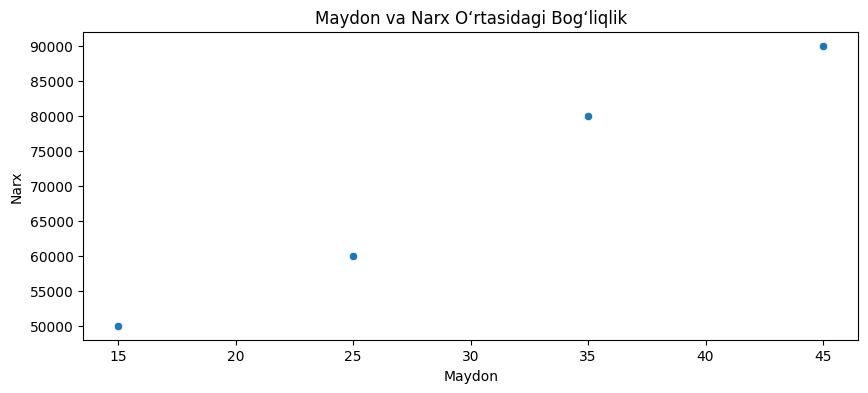

In [ ]:
# Grafik yaratib olamiz
plt.figure(figsize=(10, 4))
sns.scatterplot(x=X, y=Y)

# Jadval haqida ma'lumotlarni yozamiz
plt.title('Maydon va Narx O‘rtasidagi Bog‘liqlik')
plt.xlabel('Maydon')
plt.ylabel('Narx')
plt.show()

# Bashorat qiymati

In [ ]:
y_bashorat = a + b * X
y_bashorat

array([49000., 63000., 77000., 91000.])

# Xatolikni hisoblaymiz

In [ ]:
xatolar = Y - y_bashorat
xatolar

array([ 1000., -3000.,  3000., -1000.])

In [ ]:
# MAE - modelning aniqligini baholash uchun ishlatiladi
MAE = np.sum(np.absolute(y_bashorat - Y)) / len(Y)
print(f'MAE = {MAE}')

MAE = 2000.0


In [ ]:
# RMSE - modelning aniqligini baholash uchun ishlatiladi
RMSE = np.sqrt(np.sum((y_bashorat - Y)**2) / len(Y))
print(f'RMSE = {RMSE}')

RMSE = 2236.06797749979


In [ ]:
df

,Uy_maydoni,Uy_narxi
0,15,50000
1,25,60000
2,35,80000
3,45,90000


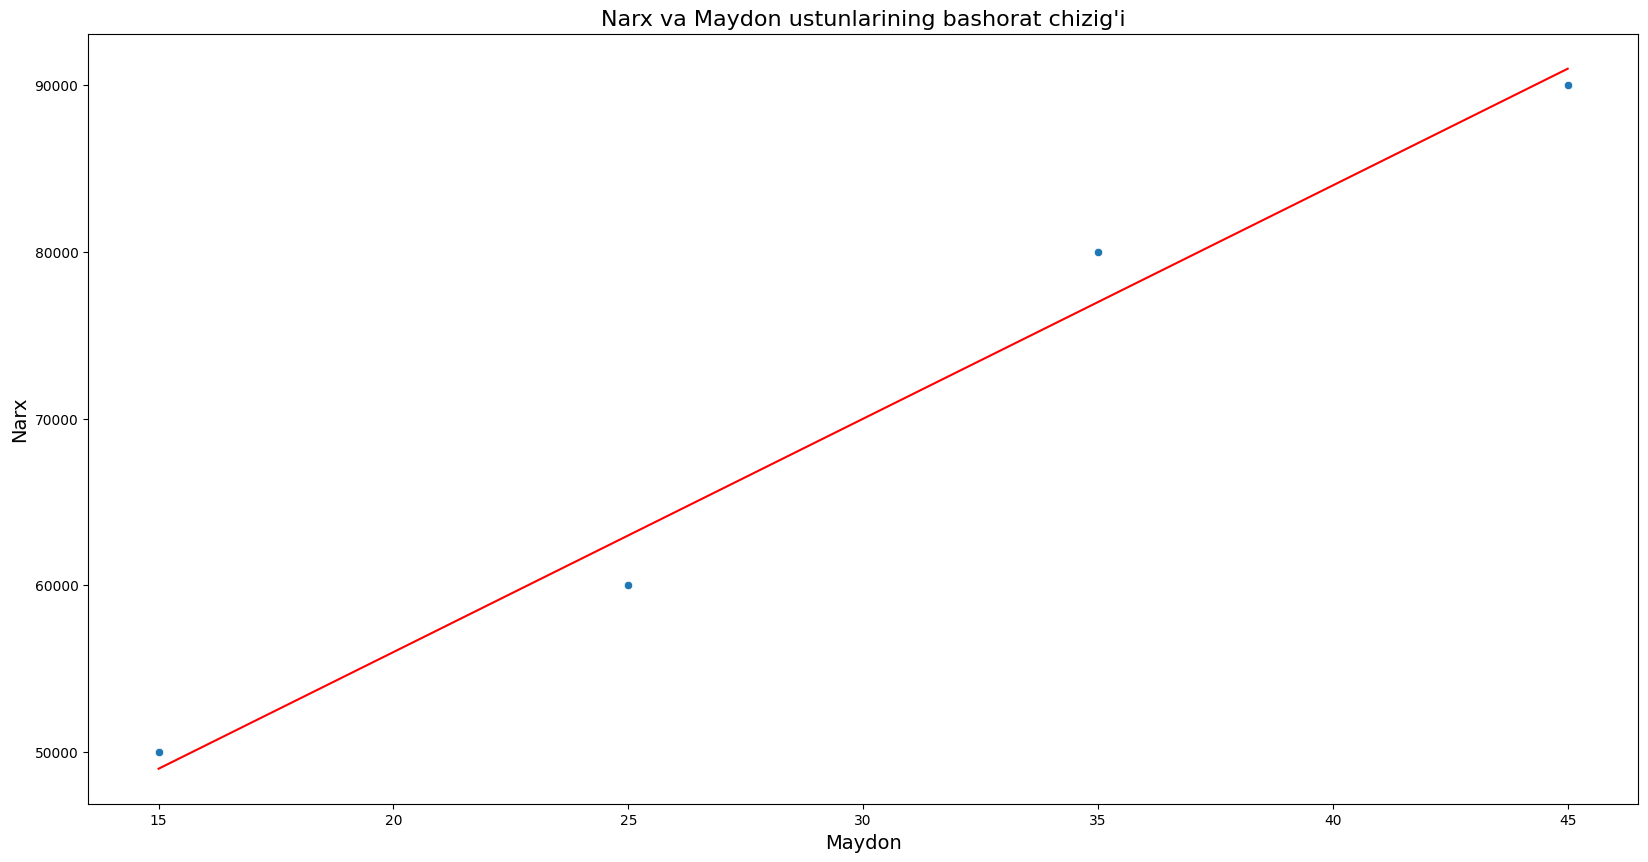

In [ ]:
plt.figure(figsize=(20, 10))


sns.scatterplot(df, x="Uy_maydoni", y="Uy_narxi")
plt.plot(X, b*X + a, '-r')

plt.title("Narx va Maydon ustunlarining bashorat chizig'i", fontdict={'fontsize': 16})
plt.xlabel("Maydon", fontdict={'fontsize': 14})
plt.ylabel("Narx", fontdict={'fontsize': 14})

plt.show()

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.5 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31631 sha256=c868ef5773f885d10fe0633eee3985ed9c9bf6367c27bdca4e992718b9ee1b95
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.8 MB/s eta 0:00:00


In [ ]:
import cv2
import mediapipe as mp

# MediaPipe yordamida harakatlarni aniqlash uchun modellarni yuklash
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Video yuklash yoki kamera orqali olish
cap = cv2.VideoCapture(0)  # 0 - kamera indeksi

# Pose detection modelini ishga tushirish
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Rasmni RGB formatiga o'tkazish
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Harakatlarni aniqlash
        results = pose.process(image)

        # Rasmni qayta BGR formatiga o'tkazish
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Aniqlangan harakatlarni rasmga chizish
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Rasmni ekranga chiqarish
        cv2.imshow('MediaPipe Pose Detection', image)

        # Chiqish uchun 'q' tugmasini bosish
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'mediapipe'